<img src="imgs/dh_logo.png" align="right" width="50%">

# Aprendizado não supervisionado para identificação de padrões: `Clustering Analysis`

#### Na aula de hoje veremos uma ferramenta importantíssima para um(a) Cientista de Dados: [`Clustering Analysis`](). Essa família de algoritmos tem como objetivo primário reconhecer padrões e agrupamentos dentro de seus dados quando você ainda não os conhece. 

#### Um exemplo disso é a segmentação de clientes e personas: como você vai aplicar um aprendizado supervisionado se ainda não sabe quantas ou quais personas consomem de você? A análise de `cluster` é, então, utilizada como auxiliar para o desenvolvimento de algoritmos de predição ou como algoritmo de descoberta de `insights`.

----------------

# Mean Shift

<img src="meanshift.gif" align="center" width="30%">

#### O [`Mean Shift`](http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/) é um procedimento para localizar os máximos (a moda) de uma função de densidade, dados discretos amostrados dessa função. Este é um método iterativo e começamos com uma estimativa inicial x. Seja dada uma função do kernel $ K (x_{i} -x) $. Esta função determina o peso dos pontos próximos para re-estimativa da média. Normalmente, é usado um kernel gaussiano à distância da estimativa atual, $ K (x_{i} -x) = e ^ {- c || x_ {i} -x || ^ {2}} $. A média ponderada da densidade na janela determinada por 

$$ 
m(x) = \frac{ \sum\limits_{x_i \in N(x)} K( x_i - x ) x_i}{ \sum\limits_{x_i \in N(x)} K( x_i - x ) } 
$$

#### em que $N(x)$ é a vizinhança de x, um conjunto de pontos para os quais $ K (x_ {i}) \neq 0 $.

#### A diferença $ m (x) -x $ é chamada de [mudança média em Fukunaga e Hostetler](http://www.cse.yorku.ca/~kosta/CompVis_Notes/mean_shift.pdf). O algoritmo de deslocamento médio agora define $ x \leftarrow m (x) $ e repete a estimativa até que $m(x)$ convirja.

<br>
<br>
<img src="meanShift_vectorization.png" align="center" width="40%">
<br>
<br>



## Inicialização do Mean Shift 

#### A ideia principal por trás do [`MeanShift`](https://mineracaodedados.wordpress.com/tag/mean-shift/) é tratar os pontos no espaço d-dimensional de atributos como uma função de densidade de probabilidade empírica onde regiões densas no espaço de atributos corresponde aos máximos locais ou modos da distribuição subjacente.

#### A largura da banda ou [`BANDWIDTH`](https://www.graphclasses.org/classes/par_25.html) é o parâmetro mais importante do MeanShift e o default, caso não seja declarado, é que seja calculado pelo método [`sklearn.cluster.estimate_bandwidth`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.estimate_bandwidth.html) do algorítmo [`MeanShift`](https://medium.com/@darkprogrammerpb/mean-shift-clustering-algorithm-from-scratch-477499caaa10). 

## Processo completo de funcionamento do Mean Shift

<img src="mean_shift_working.gif" align="center" width='50%'>


# Mean Shift sobre Dados Artificiais

#### Vamos aplicar o método de clusterização [`Mean Shift`](https://towardsdatascience.com/machine-learning-algorithms-part-13-mean-shift-clustering-example-in-python-4d6452720b00). Uma das fraquezas que observamos no [`k-Means`](http://d-scholarship.pitt.edu/32379/#:~:text=The%20K%2Dmeans%20algorithm%20Iteratively,clusters)%20in%20a%20feature%20space.) é que ele funciona de modo muito manual e repetitivo: temos que rodar um loop, extrair o cotovelo ou `silhouette scores` para então achar o melhor `k`. 

#### Contornando essa questão, existem os algoritmos de [`clustering hierárquico`](https://www.displayr.com/what-is-hierarchical-clustering/#:~:text=Hierarchical%20clustering%2C%20also%20known%20as,broadly%20similar%20to%20each%20other.), que conseguem decidir sozinhos como agrupar dados em quantas seções. Vamos observar como aplicar o [`Mean Shift`]() em dados artificiais. Criaremos [`clusters`](https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/#:~:text=Clustering%20is%20the%20task%20of,and%20assign%20them%20into%20clusters.) com o método [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), utilizando os `clusters` abaixo como `centers`, $800$ amostras e $3$ atributos.

------------------

# Implementando o MeanShift em dados sintéticos

In [1]:
# importando as bibliotecas

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sqlite3
import seaborn as sns

%matplotlib inline

## Gerando os dados em clusters

In [2]:
clusters = [[1, 1, 1],
            [5, 5, 5],
            [3, 10, 10]
           ]

#### Geramos os dados sintéticos

In [3]:
X, y = make_blobs(n_samples = 800, 
                  centers = clusters, 
                  n_features = 3, 
                  random_state = 123
                 )

## Rodando o MeanShift

#### Abaixo, vamos aplicar o [`MeanShift`](https://machinelearningmastery.com/clustering-algorithms-with-python/). Sua classe se encontra no módulo [`cluster`](https://scikit-learn.org/stable/modules/clustering.html) do [`Scikit Learn`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html). 

#### Também será necessário criar uma variável `cluster_centers` que recebe o atributo `cluster_centers_` do modelo.

#### Implementamos o `MeanShift`.

In [4]:
from sklearn.cluster import MeanShift

ms = MeanShift()
ms.fit(X)
cluster_centers = ms.cluster_centers_

#### Vamos visualizar os resultados do `Mean Shift`:

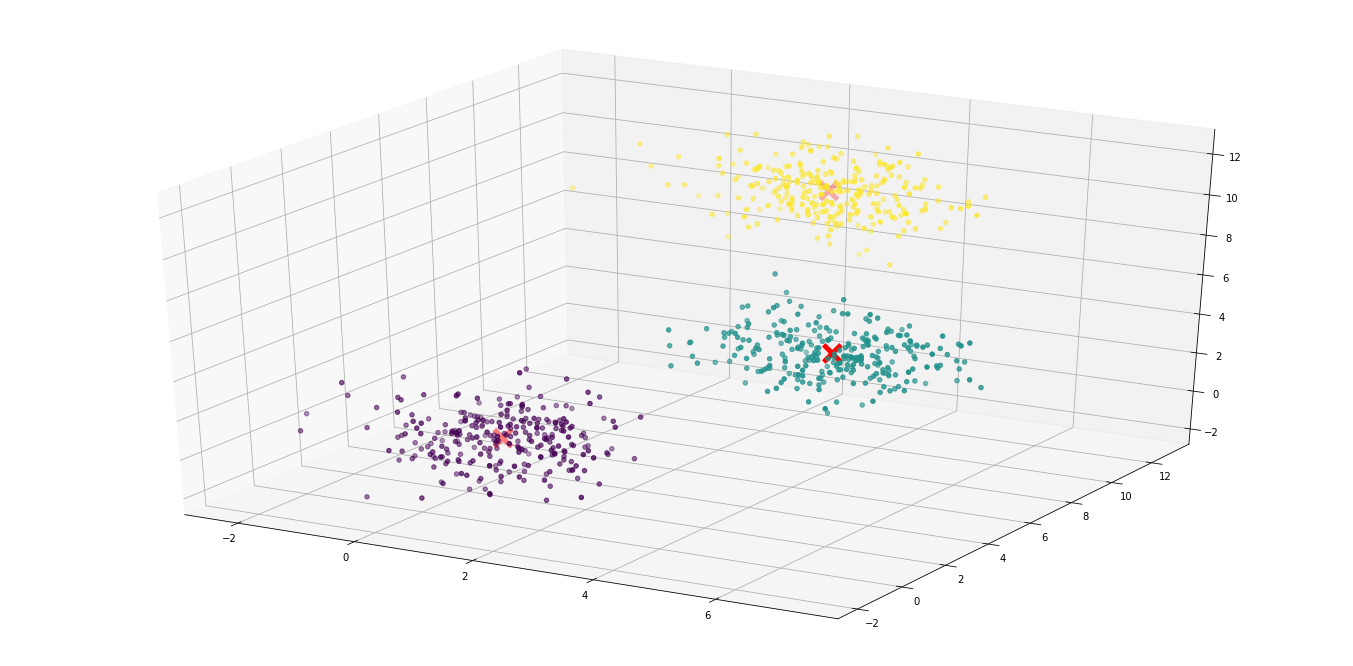

In [5]:
fig = plt.figure(figsize = (24,12))
ax = fig.add_subplot(111, 
                     projection = '3d'
                    )
ax.scatter(X[:, 0], 
           X[:, 1], 
           X[:, 2], 
           marker = 'o', 
           c = y, 
           cmap = 'viridis'
          )
ax.scatter(cluster_centers[:, 0], 
           cluster_centers[:, 1], 
           cluster_centers[:, 2], 
           marker = 'x', 
           color = 'red', 
           s = 300, 
           linewidth = 5, 
           zorder = 10
          )

------------------

# MeanShift Vs. KMeans para os mesmos dados

## Gerando mais dados e rodando a clusterização

#### Nas células abaixo vamos criar novos `clusters` com uma quantidade massiva de datapoints ($ > 10 k$) e $5$ centros. Vamos aplicar [`K-Means`](https://www.youtube.com/watch?v=4b5d3muPQmA&t=2s&ab_channel=StatQuestwithJoshStarmer) e [`Mean-Shift`](https://www.youtube.com/watch?v=3ERPpzrDkVg&ab_channel=sentdex). e estudar as diferenças tanto de performance quanto de facilidade de implementação.

In [6]:
clusters = [[1, 1, 20],
            [10, 10, 10],
            [20, 10, 1],
            [1, 20, 20],
            [20, 20, 20]
           ]
X, y = make_blobs(n_samples = 1000, 
                  centers = clusters, 
                  n_features = 3
                 )

# Implementando o kMeans

#### Vamos implementar o [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn-cluster-kmeans) com $5$ `clusters`. Para documentação oficial acesse.

#### Implementando o `KMeans`.

In [7]:
from sklearn.cluster import KMeans

# Initializing KMeans
kmeans = KMeans(n_clusters = 5)

# Fitting with inputs
kmeans = kmeans.fit(X)

# Predicting the clusters
labels = kmeans.predict(X)

# Getting the cluster centers
C = kmeans.cluster_centers_

In [8]:
labels2 = kmeans.transform(X)
#type(labels2)
#print(labels2)

In [9]:
print(labels2[0],
      labels[0]
     )

[21.21282892 17.51534972  1.67089029 26.17282596 16.38999732] 2


Cluster  1
[20.00988651  9.98937764  0.95120091]
Cluster  2
[ 0.99307811 19.9968337  19.96369835]
Cluster  3
[19.97008525 19.936982   19.96425088]
Cluster  4
[ 0.93124565  1.02765717 19.90840249]
Cluster  5
[10.04367454  9.91675859 10.03999624]


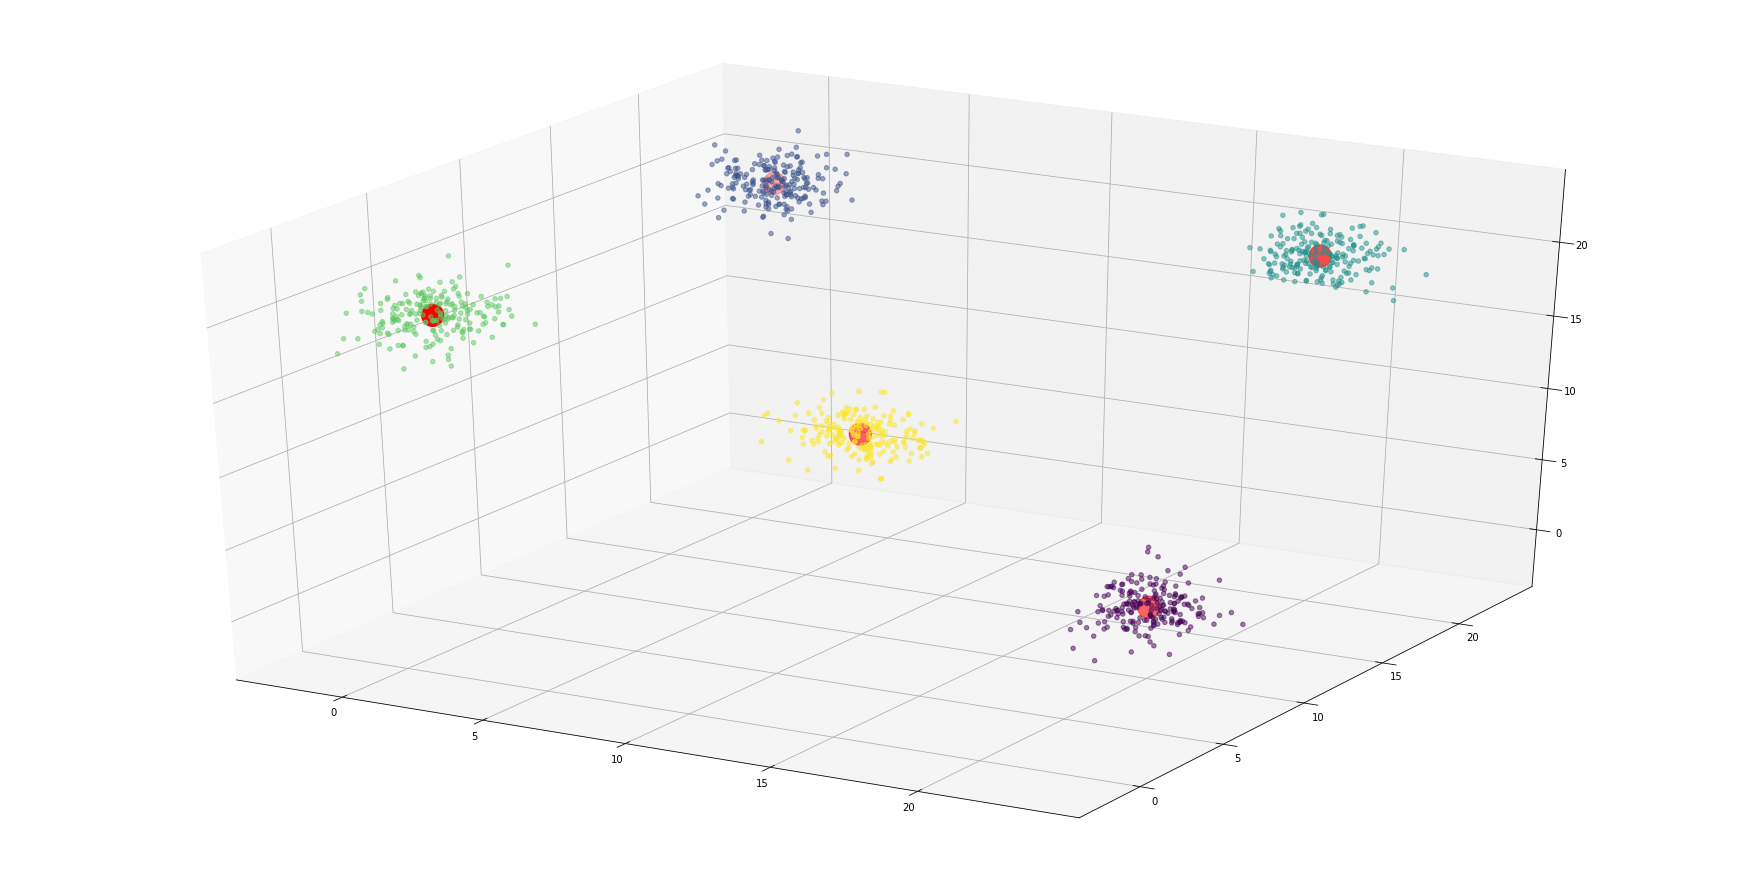

In [10]:
fig = plt.figure(figsize = (24,12))

ax = Axes3D(fig)

ax.scatter(X[:, 0], 
           X[:, 1], 
           X[:, 2], 
           c = labels, 
           alpha = 0.5, 
           cmap = 'viridis'
          )
ax.scatter(C[:, 0], 
           C[:, 1], 
           C[:, 2], 
           marker = 'o', 
           c = 'red', 
           s = 500
          )
counter = 1
for cluster in C:
    print('Cluster ',counter)
    print(cluster)
    counter += 1

# Implementando o Mean Shift para os mesmos dados

In [11]:
# implementando Mean Shift
ms = MeanShift(bandwidth = 4.9)
ms.fit(X)
cluster_centers = ms.cluster_centers_

In [12]:
cluster_centers

array([[20.00988651,  9.98937764,  0.95120091],
       [19.97008525, 19.936982  , 19.96425088],
       [10.04367454,  9.91675859, 10.03999624],
       [ 0.99307811, 19.9968337 , 19.96369835],
       [ 0.93124565,  1.02765717, 19.90840249]])

In [13]:
cluster_centers[:, 0]

array([20.00988651, 19.97008525, 10.04367454,  0.99307811,  0.93124565])

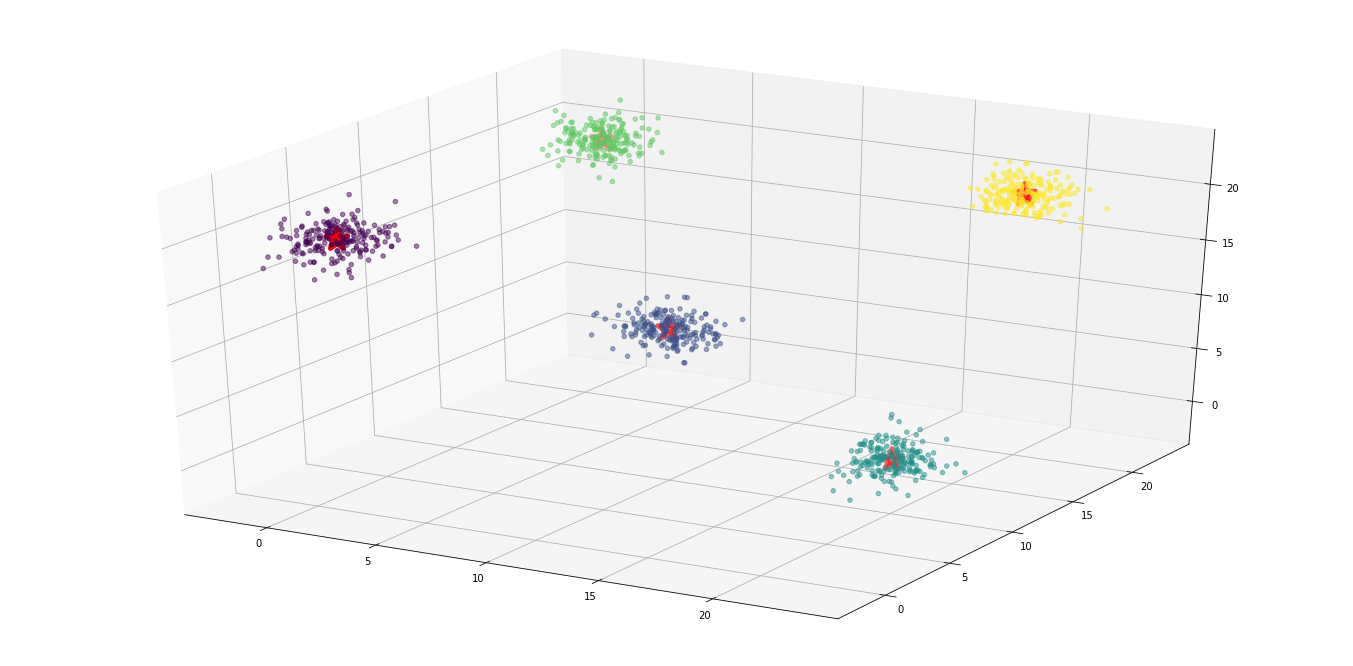

In [14]:
fig = plt.figure(figsize = (24, 12))

ax = fig.add_subplot(111, 
                     projection = '3d'
                    )
ax.scatter(X[:,0], 
           X[:,1], 
           X[:,2], 
           marker = 'o', 
           alpha = 0.5, 
           c = y, 
           cmap = 'viridis'
          )
ax.scatter(cluster_centers[:,0], 
           cluster_centers[:,1], 
           cluster_centers[:,2],
           marker = '*', 
           color = 'red', 
           s = 500, 
           linewidth = 5, 
           zorder = 10
          )

---------------

# DB_Scan

#### Em $1972$, Robert F. Ling publicou intitulado ["On the theory and construction of k-Clusters"](https://academic.oup.com/comjnl/article/15/4/326/351493) no ["The Computer Journal"](https://academic.oup.com/comjnl/article/15/4/326/351493), em que propoe uma definição para o conceito de `cluster` e com se dá a criação de um. 


#### O modelo é chamado de `Density-based spatial clustering of applications with noise `, ou [`DBSCAN`](https://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.121.9220)

#### Ele oferece uma solução para a combinação de três requisitos fundamentais para que um algoritmo de agrupamento realize a tarefa de identificação de classes em grandes bancos de dados espaciais: 

    - Requisitos mínimos de domínio conhecimento para determinar os parâmetros de entrada;
    - Descoberta de `clusters` com forma arbitrária;
    - Boa eficiencia em grandes bancos de dados.

## Principios:

#### Considere um conjunto de pontos em algum espaço a ser agrupado. Seja $\varepsilon$ um parâmetro que especifica o raio de uma vizinhança em relação a algum ponto. Para os fins do cluster [`DBSCAN`](https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d), os pontos são classificados como pontos principais, alcançáveis (densidade) e valores discrepantes, como segue:

- Um ponto $P$ é central se uma quantidade minima $minPts$ de pontos estiverem a uma distância $\varepsilon$ dele, incluindo $P$.


- Um ponto $Q$ é diretamente acessível a partir de $P$ se o ponto $Q$ estiver dentro da distância $\varepsilon$ do ponto central $P$. 


- Um ponto $Q$ é acessível a partir de $P$ se houver um caminho $P_1, ..., P_n$, com $P_1 = P$ e $P_n = Q$, em que cada $P_i + 1$ é diretamente acessível a partir de $P_i$. Observe que isso implica que todos os pontos no caminho devem ser pontos principais, com a possível exceção de $Q$.

- Todos os pontos inacessíveis a partir de qualquer outro ponto são valores atípicos ou de ruído.


- $\varepsilon$ é um parâmetro de distância para o perímetro de ação de um ponto

- Minimum Points: Número mínimo de core points, incluindo o starting point, para se cruar um cluster.

#### Agora, se $P$ é um ponto central, ele forma um `cluster` junto com todos os pontos (essenciais ou não essenciais) acessíveis a partir dele. Cada `cluster` contém pelo menos um ponto principal; pontos não essenciais podem fazer parte de um cluster, mas formam sua "borda", pois não podem ser usados para alcançar mais pontos.

<br>
<img src="dbscan_pic.png" align="center" width="40%">
<br>

#### Neste diagrama, $minPts = 4$, o ponto $A$ e os outros pontos vermelhos são pontos centrais, porque a área em torno desses pontos em um raio $\varepsilon$ contém pelo menos $4$ pontos, incluindo o próprio ponto. Como todos são acessíveis um do outro, eles formam um único `cluster`. Os pontos $B$ e $C$ não são pontos principais, mas são acessíveis a partir de $A$ (por meio de outros pontos principais) e, portanto, também pertencem ao `cluster`. O ponto $N$ é um ponto de ruído que não é um ponto central nem é alcançável diretamente.

#### A acessibilidade não é uma relação simétrica, pois, por definição, nenhum ponto pode ser alcançável a partir de um ponto não central, independentemente da distância, portanto, um ponto não central pode ser alcançável, mas nada pode ser alcançado a partir dele. Portanto, é necessária uma noção adicional de conexão para definir formalmente a extensão dos `clusters` encontrados pelo [`DBSCAN`](https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80). Dois pontos $P$ e $Q$ são conectados à densidade, se houver um ponto tal em que ambos $P$ e $Q$ sejam alcançáveis a partir de $O$. A conexão de densidade é simétrica.

#### Um cluster então satisfaz duas propriedades:

    1. Todos os pontos dentro do `cluster` são mutuamente conectados por densidade;

    2. Se um ponto é alcançável por densidade a partir de qualquer ponto do `cluster`, ele também faz parte do `cluster`.

## DB_SCAN - Clustering by Density

#### Até agora vimos algoritmos de [`clustering`](https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556) com base em centroides. Embora úteis, eles podem cair em armadilhas comuns de acordo com a forma dos dados, por exemplo, deixar um `outlier` influenciar sua média e calcular centroides errados.

#### Há uma outro tipo de algoritmos de [`clustering`](https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html) que se baseiam no conceito de densidade. Eles observam os arredores dos dados e tomam decisões a partir disso. A premissa deles é forte, pois é de se pensar que dados semelhantes estão próximos uns dos outros, independente de sua forma. <br>

#### O mais famoso algoritmo de [`clustering`](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/) por densidade é o DBSCAN (Density-Based Spatial Clustering of Applications with Noise). O DBSCAN possui 2 parâmetros:

    - `eps` ou $\varepsilon$ (epsilon): o raio da vizinhança;
    - `minPts`: o número mínimo de datapoints de uma vizinhança para que ela seja considera um `cluster`. <br>
 
#### Dessa forma, temos 3 tipos de dados a partir desse algoritmo:

     - Core points: os pontos que estão diretamente influenciando na densidade de nossa vizinhança
     - Border Points: os pontos que são alcançaveis por vizinhanças de vizinhanças
     - Outliers: pontos fora de qualquer vizinhança
 
 
<br>
<img src="DBSCAN.png" align="center" width="40%">
<br>
 
#### Os passos do DBSCAN são os seguintes:

    - Escolha um ponto que ainda não foi dito como `outlier` ou assimilado a um `cluster`. Calcule sua vizinhança e determine se é um Core Point. Se sim, inicie uma nova vizinhança a partir dele;
    - Adicione todos os directly-reachable points desse novo cluster ao seu cluster;
    - Repita esses 2 passos até todos os clusters serem encontrados;
    - Identifique os outliers.
    
<img src="dbscan.gif" align="center" width="40%">    

## Alternativa ao DBScan: OPTICS

#### O método [`OPTICS`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html) (Ordering Points To Identify the Clustering Structure), intimamente relacionado ao [`DBSCAN`](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/), encontra uma amostra principal de alta densidade e expande os [`clusters`](https://towardsdatascience.com/clustering-using-optics-cac1d10ed7a7) a partir deles. Ao contrário do `DBSCAN`, mantém a [`hierarquia`](- [What is Hierarchical Clustering?](https://www.kdnuggets.com/2019/09/hierarchical-clustering.html)) de [`cluster`](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/) para um raio de vizinhança variável. Mais adequado para uso em grandes conjuntos de dados do que a implementação `sklearn` atual do `DBSCAN`.

# Implementando o DB_Scan em dados reais

#### Vamos ver o `DBSCAN` na prática e lidaremos com o [whosale customers dataset](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers): um `dataset` de $440$ consumidores com $8$ atributos cada. Seria possível descobrir segmentos de consumidores a partir desses atributos? 


#### Nas células abaixo, importamos o dataset `'wholesale_customers_data.csv'`. Depois, chamamos os métodos exploratórios básicos.

#### Vamos ler e verificar os dados do arquivo.

In [46]:
df = pd.read_csv("wholesale_customers_data.csv")

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## Feature Engineering

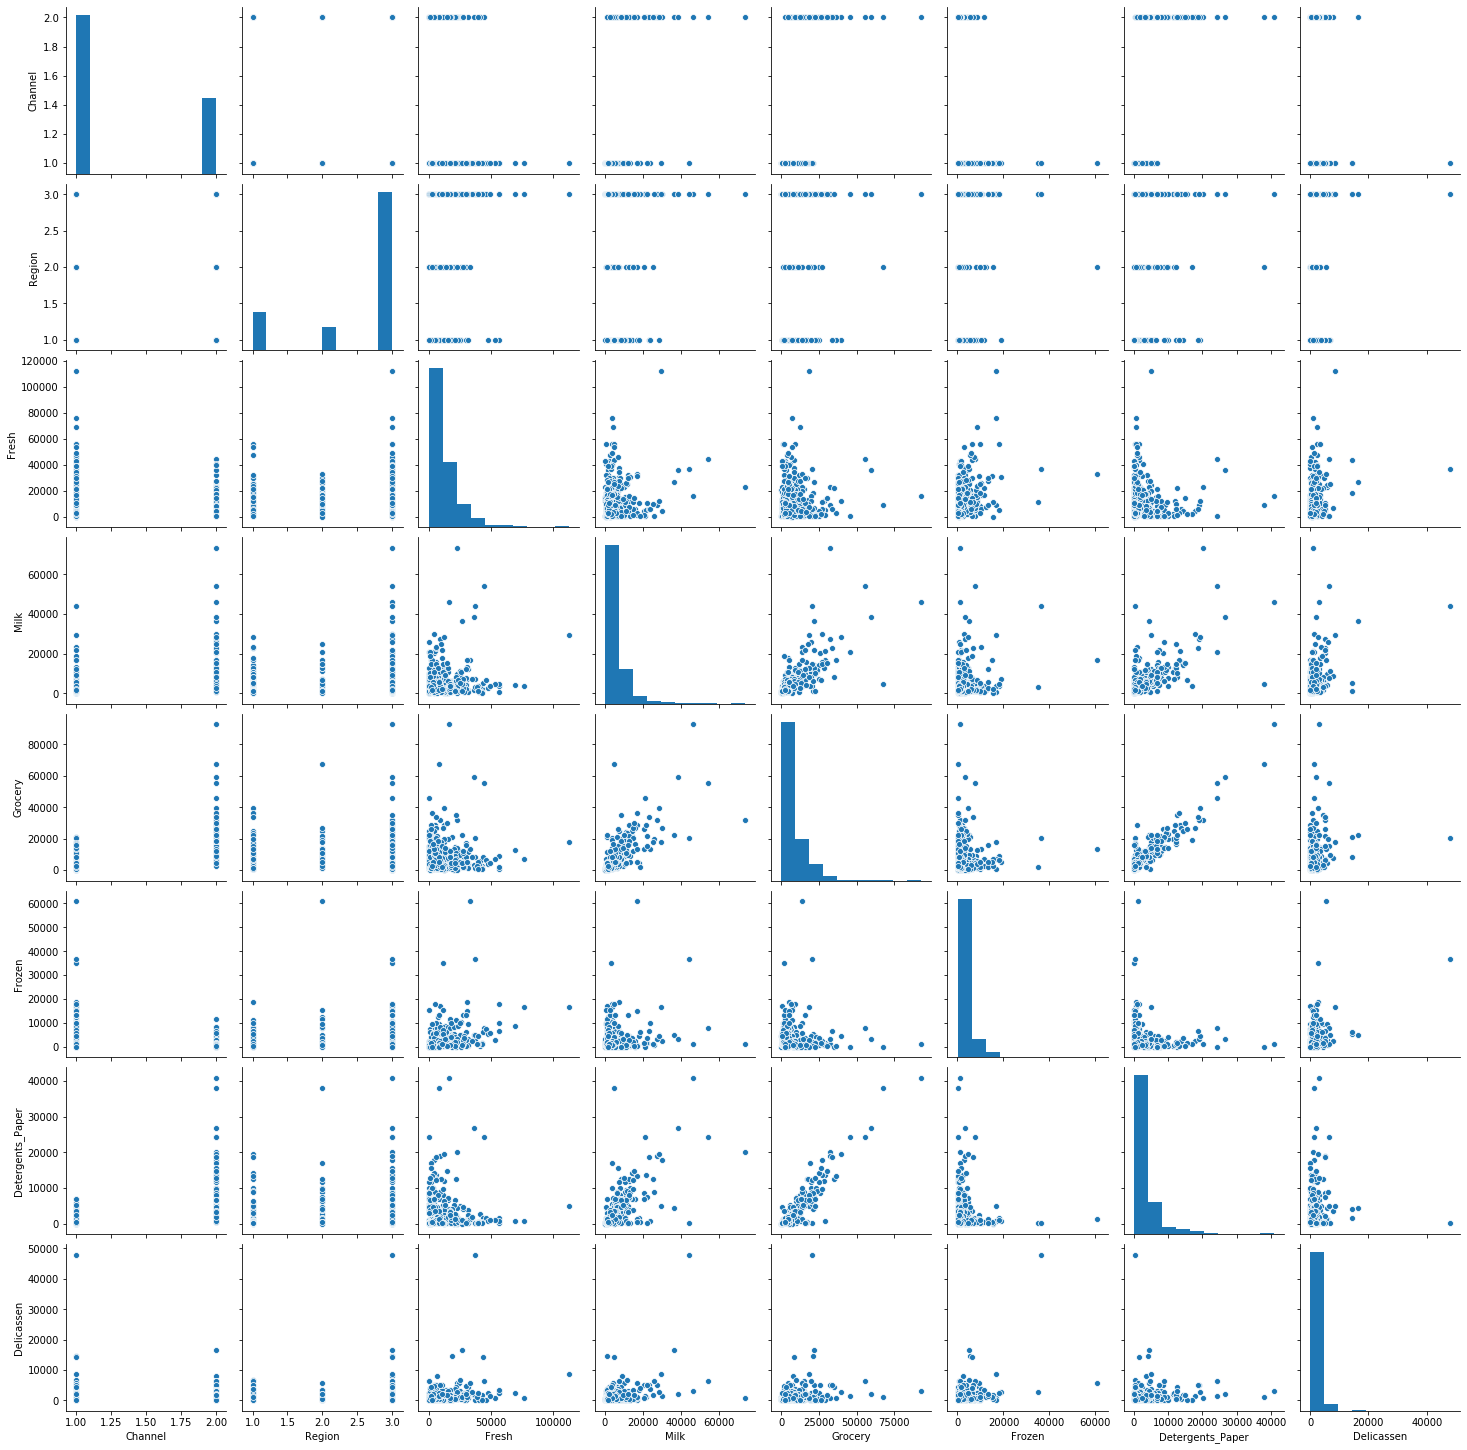

In [17]:
sns.pairplot(df)

#### Vamos eliminar as variáveis categóricas, pois não as usaremos agora.

In [47]:
df.drop(["Channel", "Region"], 
        axis = 1, 
        inplace = True
       )

Text(0, 0.5, 'Milk')

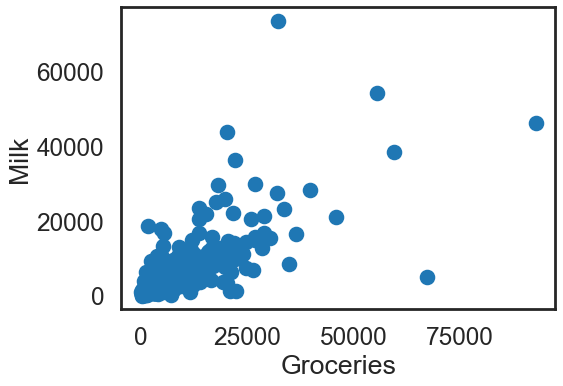

In [48]:
x = df['Grocery']
y = df['Milk']

plt.figure(figsize = (7, 5), 
           dpi = 80
          )
plt.scatter(x, y)
plt.xlabel("Groceries")
plt.ylabel("Milk")

#### Na célula abaixo, mudamos o `dataframe` `'df'` para que ele receba somente as colunas desejadas. Usaremos `'Grocery'` e `'Milk'`. Depois, faremos um `casting` como matriz utilizando o atributo `.values` e então um `casting` de `datatype` de modo concatenado para `float32`, utilizando o atributo `.astype`.

#### Redefinindo o `DataFrame` e fazendo o `casting`.

In [49]:
df = df[["Grocery", 
         "Milk"]
       ]
df = df.values.astype("float32", 
                      copy = False
                     )

#### Abaixo, precisaremos realizar o scaling de nossos dados utilizando o `Standard Scaler`. Faça o `fit_transform()` nos nossos dados! Para documentação oficial acesse [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

#### Vamos implemntar o `StandardScaler`.

In [50]:
from sklearn.preprocessing import StandardScaler

stscaler = StandardScaler().fit(df)

df = stscaler.transform(df)

## Rodando o DBSCAN

#### Podemos então utilizar o [`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), ele se encontra no módulo de `cluster` do `scikit`. Vamos implementar o algoritmo de `clustering` com $\varepsilon = 0.5$ e $min_samples = 15$.

#### E agora vamos implementar o `DBScan`.

In [51]:
from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps = 0.5, 
              min_samples = 15
             ).fit(df)

In [52]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, 
                             dtype = bool
                            )
core_samples[dbsc.core_sample_indices_] = True

In [53]:
import collections
collections.Counter(core_samples)

Counter({True: 387, False: 53})

#### Vamos ler o `dataset` novamente.

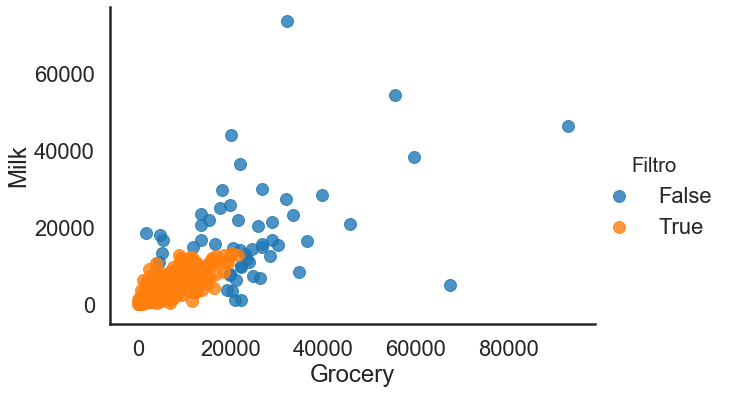

In [54]:
import seaborn as sns

df0 = pd.read_csv("wholesale_customers_data.csv")

filtro = list(core_samples)

df0["Filtro"] = filtro

sns.lmplot("Grocery", 
           "Milk", 
           data = df0, 
           fit_reg = False, 
           hue = "Filtro", 
           height = 6, 
           aspect = 1.5
          )